In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
salaries = pd.read_csv("salaries.csv")

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


In [4]:
salaries[:5]

work_year experience_level employment_type                       job_title  \
0       2023               EX              FT           Data Science Director   
1       2023               EX              FT           Data Science Director   
2       2023               MI              FT  Business Intelligence Engineer   
3       2023               MI              FT  Business Intelligence Engineer   
4       2023               SE              FT       Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  212000             USD         212000                 US             0   
1  190000             USD         190000                 US             0   
2   35000             GBP          43064                 GB             0   
3   35000             GBP          43064                 GB             0   
4  245700             USD         245700                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               GB            M  
3               GB            M  
4               US            M

In [5]:
len(salaries["job_title"].unique())

124

In [6]:
salaries["company_size"].unique()

array(['M', 'S', 'L'], dtype=object)

In [7]:
salaries["experience_level"].unique()

array(['EX', 'MI', 'SE', 'EN'], dtype=object)

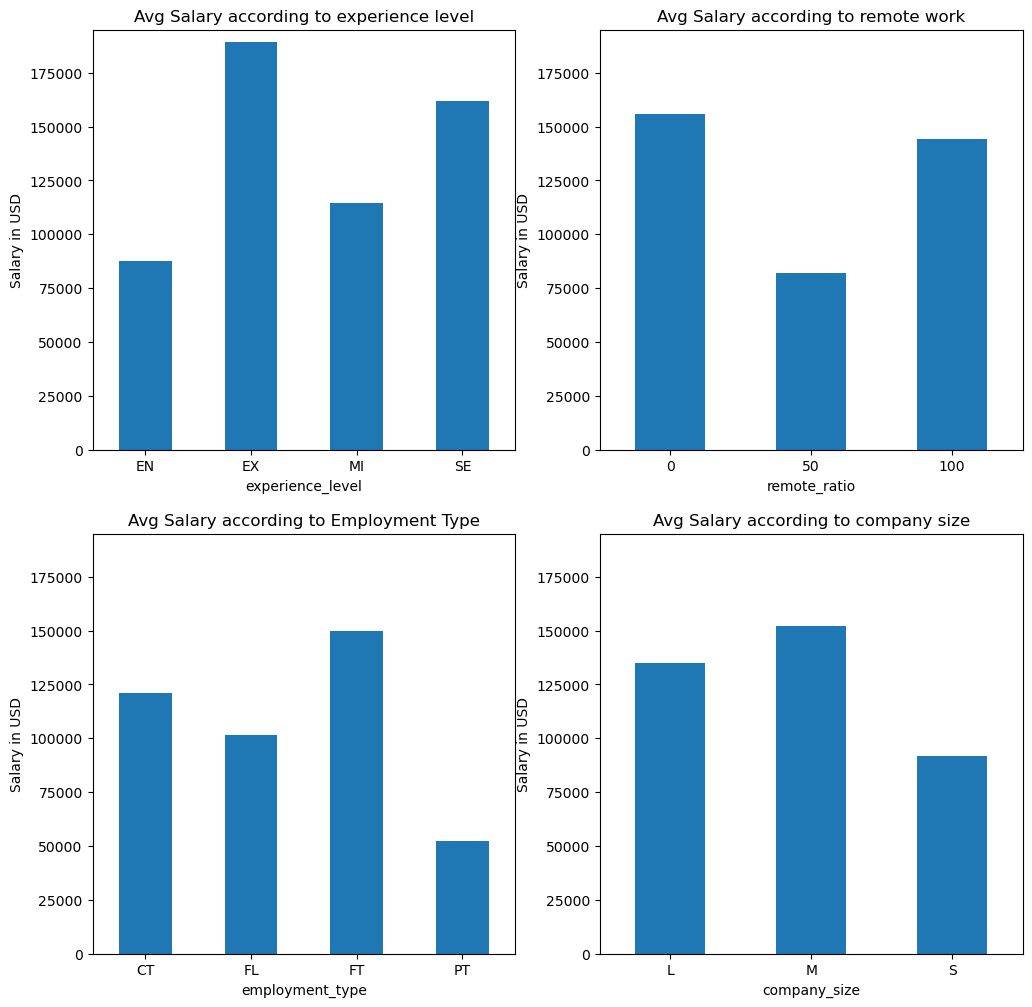

In [8]:
plt.figure(figsize = (12, 12))
plt.subplot(2,2,1)
salaries.groupby("experience_level").mean(numeric_only = True)["salary_in_usd"].plot.bar()
plt.title("Avg Salary according to experience level")
plt.xticks(rotation = 0)
plt.ylim(0, 195000)
plt.ylabel("Salary in USD")
plt.subplot(2,2,2)
salaries.groupby("remote_ratio").mean(numeric_only = True)["salary_in_usd"].plot.bar()
plt.title("Avg Salary according to remote work")
plt.xticks(rotation = 0)
plt.ylim(0, 195000)
plt.ylabel("Salary in USD")
plt.subplot(2,2,3)
salaries.groupby("employment_type").mean(numeric_only = True)["salary_in_usd"].plot.bar()
plt.title("Avg Salary according to Employment Type")
plt.xticks(rotation = 0)
plt.ylim(0, 195000)
plt.ylabel("Salary in USD")
plt.subplot(2,2,4)
salaries.groupby("company_size").mean(numeric_only = True)["salary_in_usd"].plot.bar()
plt.title("Avg Salary according to company size")
plt.xticks(rotation = 0)
plt.ylim(0, 195000)
plt.ylabel("Salary in USD")
plt.show()

In [8]:
sns.set_theme(style = "darkgrid")

<Figure size 1200x2000 with 0 Axes>

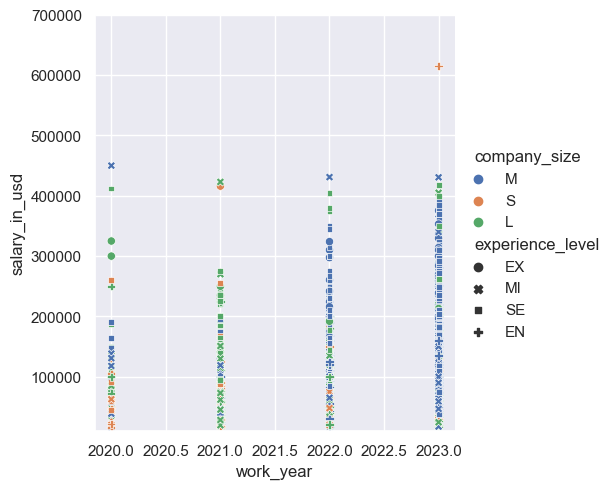

In [9]:
plt.figure(figsize = (12,20))
sns.relplot(data = salaries, x = "work_year", y = "salary_in_usd", hue = "company_size", style = "experience_level")
plt.ylim(10000, 700000)
plt.show()

## Initial Exploratory Data Analysis Summary

## Multi variable linear regression

In [10]:
replacements = {
    "experience_level": {"EX": 4, "SE": 3, "MI": 2, "EN": 1},
    "employment_type" : {"FT": 4, "PT": 3, "CT": 2, "FL": 1},
    "company_size": {"L": 3, "M": 2, "S": 1}
}
salaries.replace(replacements, inplace = True)

In [11]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   int64 
 2   employment_type     8805 non-null   int64 
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 756.8+ KB


In [12]:
X_train = np.array(salaries[["experience_level", "remote_ratio", "employment_type", "company_size"]][:6163])
Y_train = np.array(salaries["salary_in_usd"][:6163])
X_test = np.array(salaries[["experience_level", "remote_ratio", "employment_type", "company_size"]][6163:])
Y_test = np.array(salaries["salary_in_usd"][6163:])

In [13]:
X_train[:3]

array([[4, 0, 4, 2],
       [4, 0, 4, 2],
       [2, 0, 4, 2]], dtype=int64)

In [14]:
Y_train[:3]

array([212000, 190000,  43064], dtype=int64)

In [15]:
scaler_linear = StandardScaler()
X_train_scaled = scaler_linear.fit_transform(X_train)

In [16]:
X_train_scaled[:5]

array([[ 2.16042262, -0.7108575 ,  0.05214799, -0.21271   ],
       [ 2.16042262, -0.7108575 ,  0.05214799, -0.21271   ],
       [-1.33516273, -0.7108575 ,  0.05214799, -0.21271   ],
       [-1.33516273, -0.7108575 ,  0.05214799, -0.21271   ],
       [ 0.41262994, -0.7108575 ,  0.05214799, -0.21271   ]])

In [18]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    layer_output = x @ w + b
    cost = (((layer_output - y)**2).sum())/(2*m)
    return cost

In [19]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        dj_db_i = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += (f_wb - y[i])*x[i][j]
        dj_db += dj_db_i
    dj_db /= m
    dj_dw /= m
    return dj_db, dj_dw

In [20]:
b = np.ones(1)
w = np.ones(4)
compute_gradient(X_train, Y_train, w, b)

(array([-155317.91108227]),
 array([ -441646.31656661, -4917199.78095084,  -620504.48710044,
         -319380.52588025]))

In [21]:
def gradient_descent(x, y, w, b, alpha, calc_grad, calc_cost, num_iter, threshold):
    cost_history = []
    for i in range(num_iter):
        dj_db, dj_dw = calc_grad(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = calc_cost(x,y,w,b)
        cost_history.append(cost)
        if i % math.ceil(num_iter/10) == 0 or i == (num_iter-1):
            print(f"Iteration: {i:4}, Cost : {cost_history[-1]:.2f}")
        if cost < threshold:
            break
    
    return w, b

In [22]:
w_new = np.array([21577.19306017, -5403.14099139,   252.97269355,   314.28388971])
b_new = 155361.06036021418

In [23]:
w_new, b_new = gradient_descent(X_train_scaled, Y_train, w_new, b_new, 0.00001, compute_gradient, compute_cost, 5000, 0.0001)

Iteration:    0, Cost : 1819160747.61
Iteration:  500, Cost : 1819160747.61
Iteration: 1000, Cost : 1819160747.61
Iteration: 1500, Cost : 1819160747.61
Iteration: 2000, Cost : 1819160747.61
Iteration: 2500, Cost : 1819160747.61
Iteration: 3000, Cost : 1819160747.61
Iteration: 3500, Cost : 1819160747.61
Iteration: 4000, Cost : 1819160747.61
Iteration: 4500, Cost : 1819160747.61
Iteration: 4999, Cost : 1819160747.61


In [24]:
compute_cost(X_train_scaled, Y_train, [21577.19306017, -5403.14099139,   252.97269355,   314.28388971], 155361.06036021418)

1819160747.6132588

In [25]:
linear_model = LinearRegression(fit_intercept = True)

linear_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [26]:
linear_model.coef_

array([21577.19306017, -5403.14099139,   252.97269355,   314.28388971])

In [27]:
linear_model.intercept_

155361.06036021418

In [28]:
yhat = linear_model.predict(X_train_scaled)
mean_squared_error(Y_train, yhat)/2

1819160747.6132584

In [29]:
compute_cost(X_train_scaled, Y_train, w_new, b_new)

1819160747.6132584

In [30]:
X_test_scaled = scaler_linear.transform(X_test)

In [31]:
X_test_scaled[:4]

array([[ 0.41262994, -0.7108575 ,  0.05214799, -0.21271   ],
       [ 0.41262994, -0.7108575 ,  0.05214799, -0.21271   ],
       [-1.33516273, -0.7108575 ,  0.05214799, -0.21271   ],
       [-3.08295541,  1.42154201,  0.05214799, -0.21271   ]])

In [32]:
yhat_test = linear_model.predict(X_test_scaled)

In [33]:
mean_squared_error(Y_test, yhat_test)/2

1633806615.5871916

## Linear Regression Conclusion
I tried to fit the data using linear regression with 4 features ("experience_level", "remote_ratio", "employment_type", "company_size"). I used a custom made linear regression function and used the sklearn library for linear regression as well.
Both the methods gave similar results which were not satisfactory.

## Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense